<a href="https://colab.research.google.com/github/MachineLearningSolutions/MLCodes/blob/master/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
from sklearn.linear_model import LinearRegression

simple_regression=False

#Create a dataset
if simple_regression:
  x = np.array([1, 2, 3, 4, 5, 6])  #independent variable  - simple linear regression
else:
  x = np.array ([[1,2,3,4,5,6],[2,5,7,11,13,19]]) #independent variable  - multiple linear regression
  
y = np.array([8, 17, 12, 40, 32,50])  #dependent variable


#Create a linear regression model
model = LinearRegression(fit_intercept=True, normalize=False)

#Fit the model and calculate coefficients
if simple_regression:
  x_2d=x.reshape((-1, 1))   #For simple linear regression
else:
  x_2d=np.transpose(x)    #For multiple linear regression
  
model.fit(x_2d,y)


#Print coefficients
print('bias:', model.intercept_)
print('coefficients:', model.coef_)

bias: 6.573033707865175
coefficients: [-6.93258427  4.65168539]


In [55]:
#Manually calculating coefficients from closed form solution:
x_original=np.copy(x)
y_original=np.copy(y)

if simple_regression:
  x=(x.reshape((-1, 1))) #Reshape to make x 2D  - For simple linear regression
else:
  x=np.transpose(x)   #For multiple linear regression
  
x=np.insert(x, 0, 1,1) #Insert dummy variable 1 to handle bias
y=(y.reshape((-1, 1))) #Reshape to make y 2D 

#Manual calculation of coefficients
coeffs=np.matmul(np.matmul(np.linalg.inv(np.matmul(np.transpose(x),x)),np.transpose(x)),y)  #  inv(X'X)X'y
print('bias:', coeffs[0][0])
print('coefficients:', coeffs[1:,0])

bias: 6.573033707863745
coefficients: [-6.93258427  4.65168539]


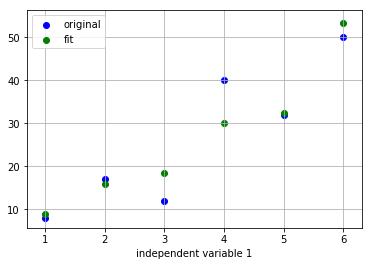

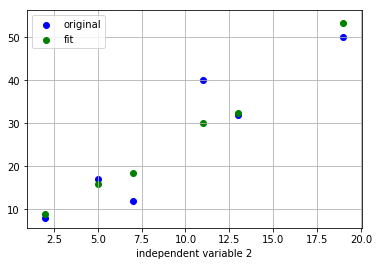

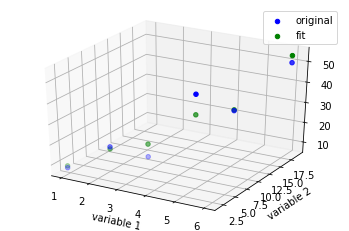

In [66]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#Visualize the fit
y_pred=np.matmul(x,coeffs)

if simple_regression:
  #Plot original data
  plt.scatter(x_original, y_original,c='b',label='original')  
  #Plot the fit
  plt.scatter(x_original, y_pred,c='g',label='fit') 
  plt.xlabel('independent variable')
else:
  fig1, ax1 = plt.subplots()
  #Plot original data w.r.t feature 1
  ax1.scatter(x_original[0,:], y_original,c='b',label='original')  
  #Plot the fit
  ax1.scatter(x_original[0,:], y_pred,c='g',label='fit') 
  ax1.set_xlabel('independent variable 1')
  plt.grid(True)
  plt.legend()
  
  fig2, ax2 = plt.subplots()
  #Plot original data w.r.t feature 2
  ax2.scatter(x_original[1,:], y_original,c='b',label='original')  
  #Plot the fit
  ax2.scatter(x_original[1,:], y_pred,c='g',label='fit') 
  ax2.set_xlabel('independent variable 2')
  plt.grid(True)
  plt.legend()
  
  #fig3D = plt.figure()
  #ax3D = fig3D.add_subplot(111, projection='3d')
  #ax3D.plot(x_original[0,:], x_original[1,:],y_original)
  
  fig3D = plt.figure()
  ax3D = fig3D.add_subplot(111, projection='3d')
  ax3D.scatter(x_original[0,:], x_original[1,:],y_original,c='b',label='original')
  ax3D.scatter(x_original[0,:], x_original[1,:],np.squeeze(y_pred),c='g',label='fit')
  ax3D.set_xlabel(' variable 1')
  ax3D.set_ylabel(' variable 2')
  plt.legend()



#Add grid
plt.grid(True)
plt.legend()
